In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


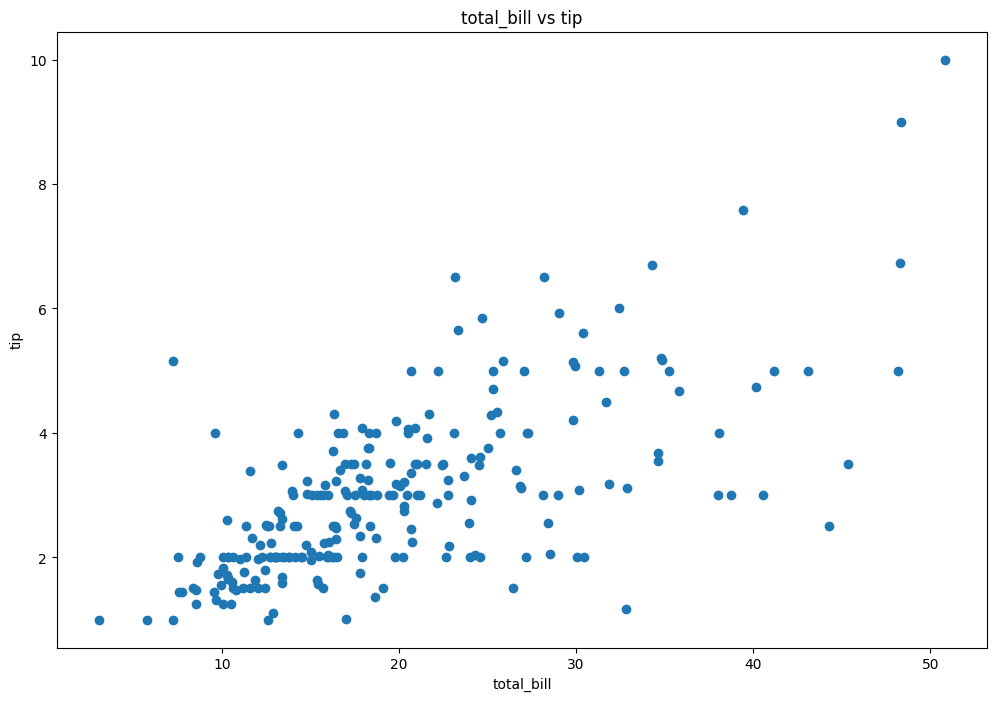

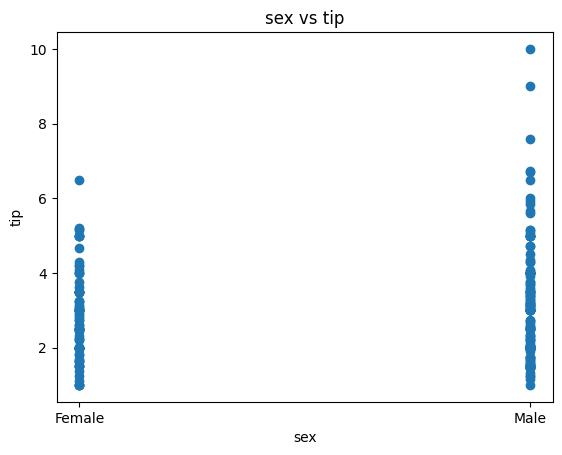

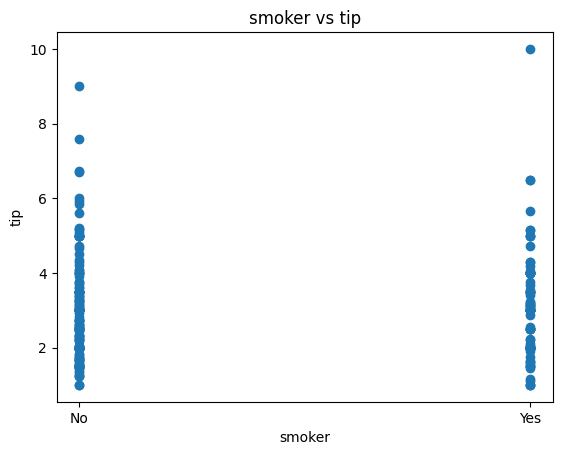

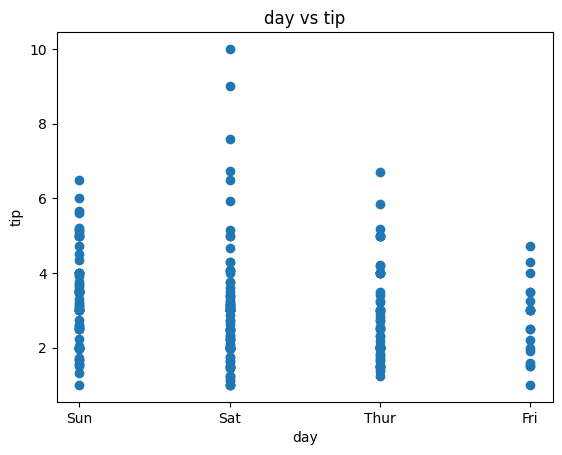

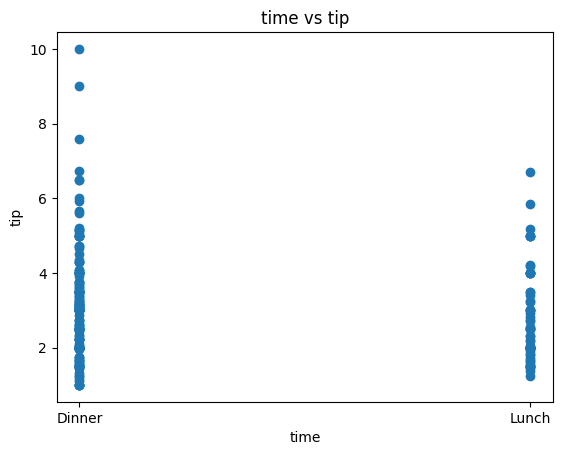

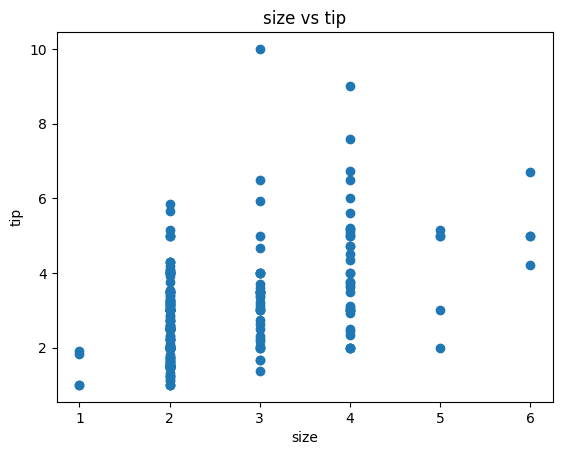

In [5]:
df_data = df.drop(columns=['tip'])
df_target = df['tip']

plt.figure(figsize=(12, 8))

# Plotting a scatterplot
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('tip')
    plt.title(df_data.columns[i] + ' vs tip')
    plt.show()

- A larger tip tends to be resonated with a higher total bill.
- Tips are generally higher during dinner compared to lunch.
- Fridays see the lowest average tip amounts.
- Saturday shows the highest variation in tip amounts.
- Sunday receives the highest overall tip amounts.
- Men tend to give significantly higher tips than women.
- Smokers and non-smokers contribute similar tip amounts on average.

<Axes: >

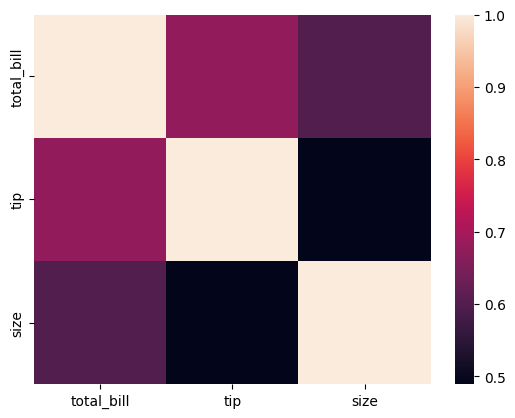

In [6]:
# Plotting Correlation Matrix
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

### Clear correlation can be seen between total amount and tip as well as size and tip.

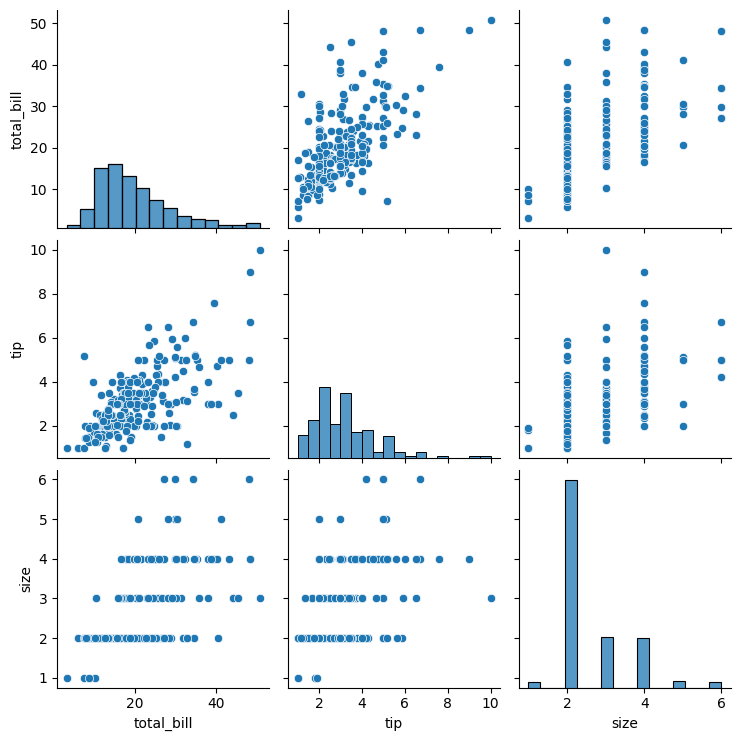

In [7]:
sns.pairplot(df)

In [8]:
label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(df['sex'])
df_data['smoker'] = label_encoder.fit_transform(df['smoker'])
df_data['day'] = label_encoder.fit_transform(df['day'])
df_data['time'] = label_encoder.fit_transform(df['time'])

In [9]:
import statsmodels.api as sm
# Define the two variables to be fit on the regression model

X = df_data
X = sm.add_constant(X)
y = df_target

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [10]:
# Calculate the p-value for hypothesis
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


### To check whether there a linear model is appropriate, we use the Rainbow test.

- We define the null hypothesis as "The regression is linear" and the alternative hypothesis as "The regression is not linear".
- If the p-value is less than some threshold (e.g. 0.05), then the null hypothesis is rejected and the alternative hypothesis is accepted. If the p-value is greater than some threshold (e.g. 0.05), then the null hypothesis is accepted and the alternative hypothesis is rejected.
- Here, we see that the p-value is higher than 0.05, so we accept the null hypothesis and reject the alternative hypothesis. This means that the regression is correctly modelled as linear.

### We will carry out the model analysis after each model to check its performances.

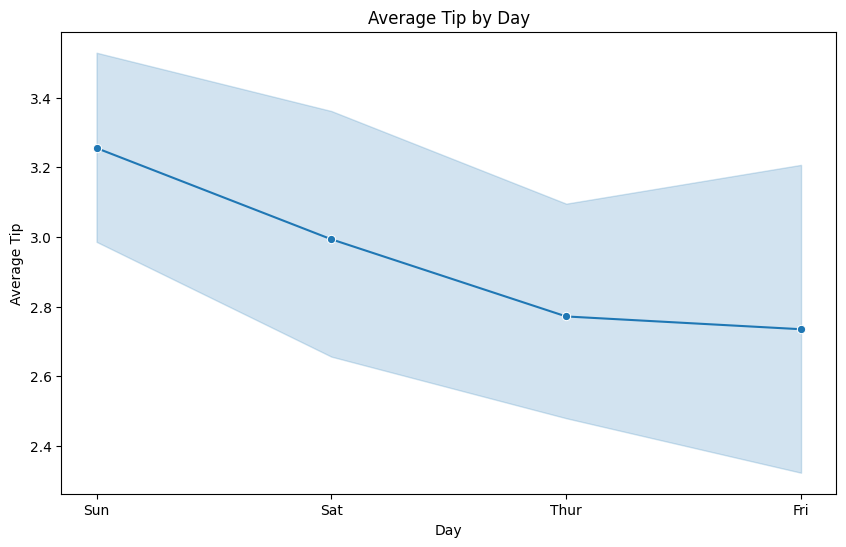

In [11]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [12]:
# Preparing the data to be fit in the model.

tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Analysing model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", np.sqrt(mse_lr))

Linear Regression -
MSE: 0.7033566017436106 
R^2: 0.43730181943482493 
RMSE: 0.8386635807900631


In [14]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Analysing model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression -
MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
RMSE: 0.768669542129225


In [15]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Analysing model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression -
MSE: 0.7007477213216077 
R^2: 0.4393889716178484 
RMSE: 0.8371067562274287


In [16]:
# Decision Trees
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Analysing model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree -
MSE: 1.2551938775510205 
R^2: -0.004178121600921791 
RMSE: 1.120354353564541


In [17]:
# Random Forest
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Analysing model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))

Random Forest -
MSE: 0.9196720148979602 
R^2: 0.2642455218065466 
RMSE: 0.9589953153680993


In [18]:
# Support Vector
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Analysing model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 0.6524534436627769 
R^2: 0.47802527943520123 
RMSE: 0.8077459029068342


In [19]:
# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Analysing model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))

K-Nearest Neighbors -
MSE: 0.8763725714285714 
R^2: 0.29888587066985495 
RMSE: 0.9361477294896203


In [20]:
# Check coefficients in Lasso model for feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Significant Factors impacting tips:")
print(significant_features)

Significant Factors impacting tips:
size          0.108081
total_bill    0.099099
dtype: float64


### Best model is the one with highest R^2 and lowest MSE, so in this case, it is Lasso regression

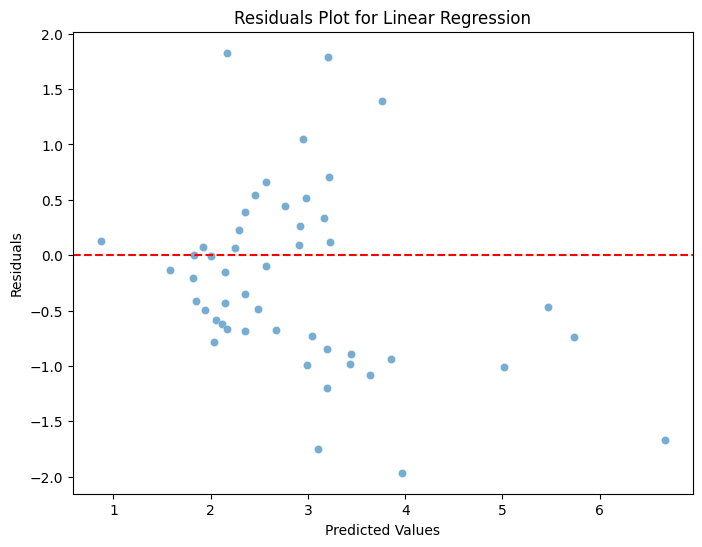

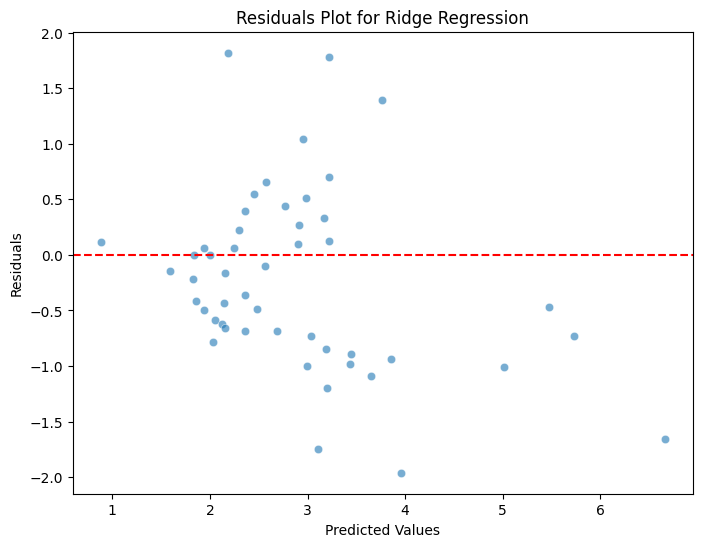

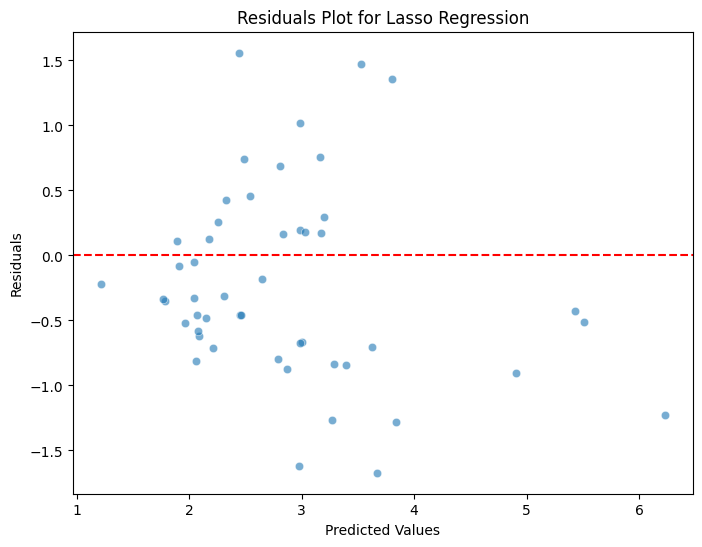

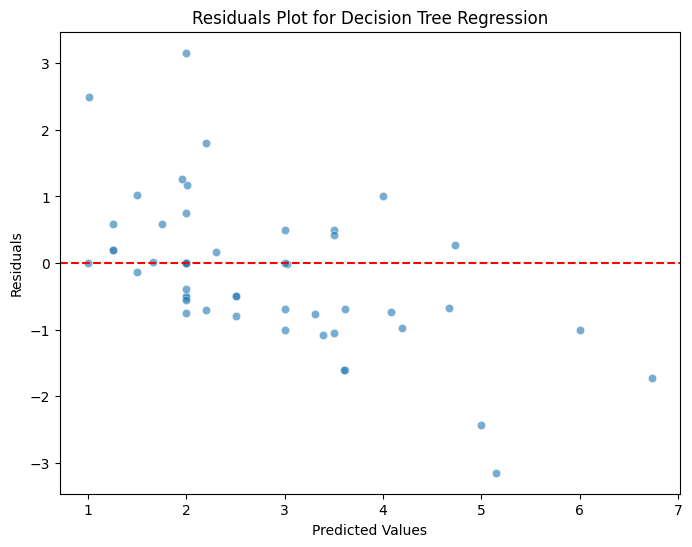

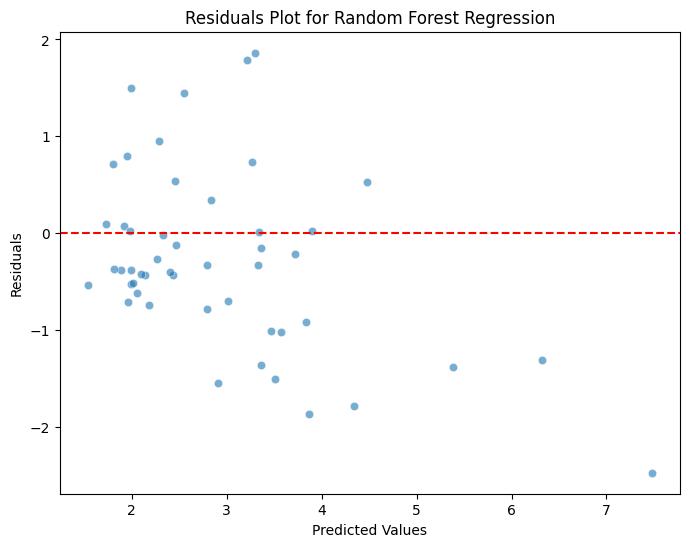

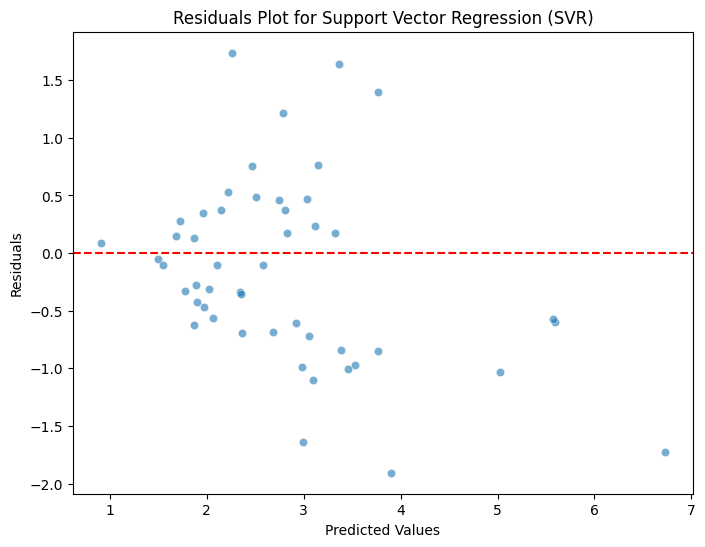

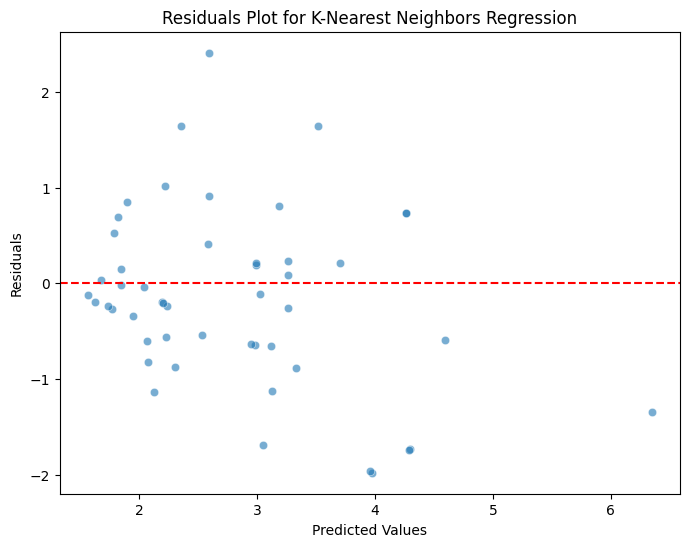

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = lin_reg.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

# Conclusion
- The business should target their best servie to customers on the Sundays and increase quality of services on the Friday to make the tip rate higher.
- The business should also focus on the dinner time to increase the tip rate
- Higher number of people in a table should be given higher priority as they tend to tip more
- The business should also focus on the total bill as it has a high correlation with the tip amount